In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 9.2MB/s 
     |████████████████████████████████| 2.1MB 34.6MB/s 
     |████████████████████████████████| 808kB 39.9MB/s 
     |████████████████████████████████| 8.7MB 23.7MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: setuptools 50.3.2
    Uninstalling setuptools-50.3.2:
      Successfully uninstalled setuptools-50.3.2
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
pip install pyramid-arima

In [ ]:
!pip install chart_studio

     |████████████████████████████████| 71kB 4.4MB/s 


In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

import chart_studio.plotly as plot_mpl
import plotly.graph_objs as go
import xgboost as xgb
import keras.backend as K
import tensorflow as tf

from math import sqrt
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
#from pmdarima.arima import auto_arima
from pyramid.arima import auto_arima


from socket import socket
from statsmodels.tsa.seasonal import seasonal_decompose

#from keras.models import Sequential
#from tensorflow.keras.models import Sequential


from keras.layers import Conv1D, LSTM, TimeDistributed, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [3]:
#Set parameters to see all data
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [13]:
# Load Train dataset
train = pd.read_csv("lite_data.csv")
train.head(100)

,Price,Open,High,Low,Vol.,Change %
0,44.478,43.148,44.787,42.792,10.24M,3.08%
1,42.950,44.453,45.130,42.310,7.59M,-3.43%
2,44.947,42.978,45.182,42.582,14.85M,4.65%
3,46.025,44.947,46.556,43.962,8.88M,2.40%
4,46.047,46.002,46.540,45.179,18.32M,0.05%
5,46.078,46.019,46.538,44.582,19.53M,0.07%
6,45.246,46.042,47.120,44.851,10.51M,-1.81%
7,45.697,45.195,45.857,44.953,11.04M,1.00%
8,46.258,45.697,46.714,45.423,10.93M,1.23%
9,46.276,46.266,48.477,45.324,14.41M,0.04%


In [10]:
# Load test dataset
test = train[0:7].copy()
test.head(70)

,Price,Open,High,Low,Vol.,Change %
0,44.478,43.148,44.787,42.792,10.24M,3.08%
1,42.950,44.453,45.130,42.310,7.59M,-3.43%
2,44.947,42.978,45.182,42.582,14.85M,4.65%
3,46.025,44.947,46.556,43.962,8.88M,2.40%
4,46.047,46.002,46.540,45.179,18.32M,0.05%
5,46.078,46.019,46.538,44.582,19.53M,0.07%
6,45.246,46.042,47.120,44.851,10.51M,-1.81%


In [7]:
cols = test.columns
for i in range(test.shape[0]):
    for col in cols:
        test[col] = 0

In [12]:
train[:100].head(100)

,Price,Open,High,Low,Vol.,Change %
0,44.478,43.148,44.787,42.792,10.24M,3.08%
1,42.950,44.453,45.130,42.310,7.59M,-3.43%
2,44.947,42.978,45.182,42.582,14.85M,4.65%
3,46.025,44.947,46.556,43.962,8.88M,2.40%
4,46.047,46.002,46.540,45.179,18.32M,0.05%
5,46.078,46.019,46.538,44.582,19.53M,0.07%
6,45.246,46.042,47.120,44.851,10.51M,-1.81%
7,45.697,45.195,45.857,44.953,11.04M,1.00%
8,46.258,45.697,46.714,45.423,10.93M,1.23%
9,46.276,46.266,48.477,45.324,14.41M,0.04%


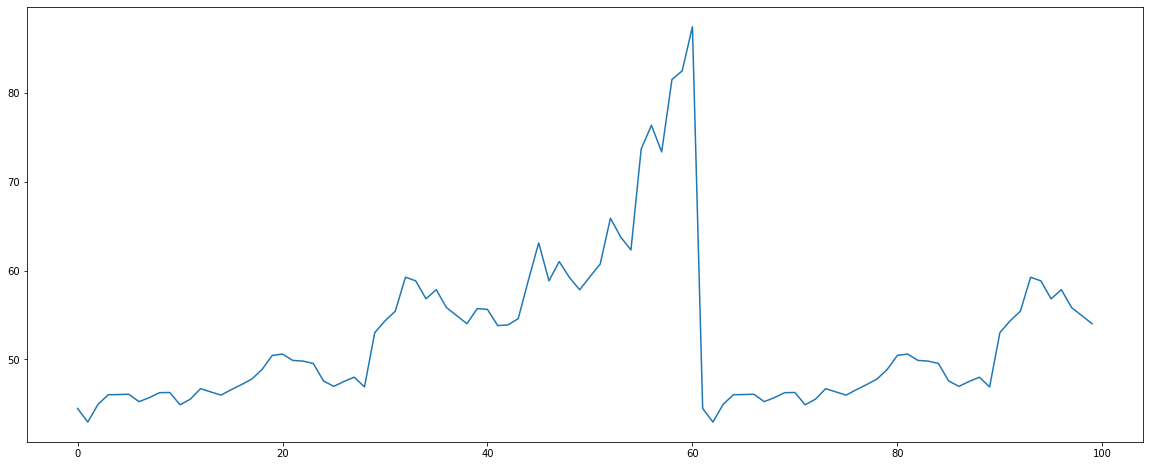

In [8]:
#Plot data
train[:100].Price.plot(figsize=(20,8))

In [14]:
train.shape

(122, 6)

In [15]:
train.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

# **Preprocess**

In [16]:
#Stationary Control
#if P-Value is smaller than 0.005, we can say that there is stationary, else there is no stationary
#if our data has no stationary, I will plan to use differences

class Stationary:
    def __init__(self, significance=.005):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None

    def ADF_Stationarity_Test(self, timeseries, printResults=True):

        # Dickey-Fuller test:
        print(timeseries)
        try:
            adfTest = adfuller(timeseries, autolag='AIC')

            self.pValue = adfTest[1]

            if (self.pValue < self.SignificanceLevel):
                self.isStationary = True
            else:
                self.isStationary = False
            #self.isStationary=True
            if printResults:
                dfResults = pd.Series(adfTest[0:4],
                                      index=['ADF Test Statistic', 'P-Value', '# Lags Used', '# Observations Used'])

                # Add Critical Values
                for key, value in adfTest[4].items():
                    dfResults['Critical Value (%s)' % key] = value

                print('Augmented Dickey-Fuller Test Results:')
                print(dfResults)
        except Exception as e:
          print(e)
          self.isStationary = False

In [17]:
sTest = Stationary()

In [18]:
sTest.ADF_Stationarity_Test(train['Price'])
print(sTest.isStationary)

0      44.478
1      42.950
2      44.947
3      46.025
4      46.047
5      46.078
6      45.246
7      45.697
8      46.258
9      46.276
10     44.892
11     45.518
12     46.707
13     46.340
14     45.982
15     46.596
16     47.172
17     47.787
18     48.861
19     50.455
20     50.605
21     49.892
22     49.814
23     49.549
24     47.581
25     46.968
26     47.520
27     47.997
28     46.905
29     53.012
30     54.346
31     55.431
32     59.263
33     58.852
34     56.826
35     57.861
36     55.838
37     54.937
38     54.023
39     55.730
40     55.636
41     53.815
42     53.888
43     54.603
44     58.961
45     63.130
46     58.856
47     61.027
48     59.232
49     57.843
50     59.320
51     60.744
52     65.913
53     63.787
54     62.332
55     73.705
56     76.375
57     73.376
58     81.527
59     82.505
60     87.482
61     44.478
62     42.950
63     44.947
64     46.025
65     46.047
66     46.078
67     45.246
68     45.697
69     46.258
70     46.276
71    

In [19]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        # print(interval, dataset[i], dataset[i - interval])
        diff.append(value)
    return pd.Series(diff)

In [20]:
diff_values = difference(train['Price'], 1)

In [21]:
 # split train test datasets
 xtrain, xtest = diff_values[0:-8], diff_values[-8:]

In [22]:
xtest

113    -2.126
114    -1.455
115    11.373
116     2.670
117    -2.999
118     8.151
119     0.978
120     4.977
dtype: float64

In [23]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    dfx = pd.DataFrame(data)
    df = dfx.assign(**{
        '{} (t-{})'.format(col, t): dfx[col].shift(t)
        for t in range(lag+1)
        for col in dfx
    })

    df=df.drop([df.columns[0]], axis=1)
    df=df[df.columns[::-1]]
    return df[lag:]

In [24]:
# scale train and test data to [-1, 1] with MinMaxScaler
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler()  
    
    # StandardScaler()
    scaler = scaler.fit(train)

    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    tr_scaled = scaler.transform(train)

    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    ts_scaled = scaler.transform(test)
    
    return scaler, tr_scaled, ts_scaled

In [25]:
# reorganize dataset acording to window size
values_unscaled = np.concatenate((xtrain, xtest))
supervised_raw = timeseries_to_supervised(values_unscaled, 30)

In [26]:
supervised_raw

,0 (t-30),0 (t-29),0 (t-28),0 (t-27),0 (t-26),0 (t-25),0 (t-24),0 (t-23),0 (t-22),0 (t-21),0 (t-20),0 (t-19),0 (t-18),0 (t-17),0 (t-16),0 (t-15),0 (t-14),0 (t-13),0 (t-12),0 (t-11),0 (t-10),0 (t-9),0 (t-8),0 (t-7),0 (t-6),0 (t-5),0 (t-4),0 (t-3),0 (t-2),0 (t-1),0 (t-0)
30,-1.528,1.997,1.078,0.022,0.031,-0.832,0.451,0.561,0.018,-1.384,0.626,1.189,-0.367,-0.358,0.614,0.576,0.615,1.074,1.594,0.150,-0.713,-0.078,-0.265,-1.968,-0.613,0.552,0.477,-1.092,6.107,1.334,1.085
31,1.997,1.078,0.022,0.031,-0.832,0.451,0.561,0.018,-1.384,0.626,1.189,-0.367,-0.358,0.614,0.576,0.615,1.074,1.594,0.150,-0.713,-0.078,-0.265,-1.968,-0.613,0.552,0.477,-1.092,6.107,1.334,1.085,3.832
32,1.078,0.022,0.031,-0.832,0.451,0.561,0.018,-1.384,0.626,1.189,-0.367,-0.358,0.614,0.576,0.615,1.074,1.594,0.150,-0.713,-0.078,-0.265,-1.968,-0.613,0.552,0.477,-1.092,6.107,1.334,1.085,3.832,-0.411
33,0.022,0.031,-0.832,0.451,0.561,0.018,-1.384,0.626,1.189,-0.367,-0.358,0.614,0.576,0.615,1.074,1.594,0.150,-0.713,-0.078,-0.265,-1.968,-0.613,0.552,0.477,-1.092,6.107,1.334,1.085,3.832,-0.411,-2.026
34,0.031,-0.832,0.451,0.561,0.018,-1.384,0.626,1.189,-0.367,-0.358,0.614,0.576,0.615,1.074,1.594,0.150,-0.713,-0.078,-0.265,-1.968,-0.613,0.552,0.477,-1.092,6.107,1.334,1.085,3.832,-0.411,-2.026,1.035
35,-0.832,0.451,0.561,0.018,-1.384,0.626,1.189,-0.367,-0.358,0.614,0.576,0.615,1.074,1.594,0.150,-0.713,-0.078,-0.265,-1.968,-0.613,0.552,0.477,-1.092,6.107,1.334,1.085,3.832,-0.411,-2.026,1.035,-2.023
36,0.451,0.561,0.018,-1.384,0.626,1.189,-0.367,-0.358,0.614,0.576,0.615,1.074,1.594,0.150,-0.713,-0.078,-0.265,-1.968,-0.613,0.552,0.477,-1.092,6.107,1.334,1.085,3.832,-0.411,-2.026,1.035,-2.023,-0.901
37,0.561,0.018,-1.384,0.626,1.189,-0.367,-0.358,0.614,0.576,0.615,1.074,1.594,0.150,-0.713,-0.078,-0.265,-1.968,-0.613,0.552,0.477,-1.092,6.107,1.334,1.085,3.832,-0.411,-2.026,1.035,-2.023,-0.901,-0.914
38,0.018,-1.384,0.626,1.189,-0.367,-0.358,0.614,0.576,0.615,1.074,1.594,0.150,-0.713,-0.078,-0.265,-1.968,-0.613,0.552,0.477,-1.092,6.107,1.334,1.085,3.832,-0.411,-2.026,1.035,-2.023,-0.901,-0.914,1.707
39,-1.384,0.626,1.189,-0.367,-0.358,0.614,0.576,0.615,1.074,1.594,0.150,-0.713,-0.078,-0.265,-1.968,-0.613,0.552,0.477,-1.092,6.107,1.334,1.085,3.832,-0.411,-2.026,1.035,-2.023,-0.901,-0.914,1.707,-0.094


In [27]:
supervised_raw = supervised_raw.values.astype("float32")

In [28]:
supervised_raw

array([[-1.528,  1.997,  1.078, ...,  6.107,  1.334,  1.085],
       [ 1.997,  1.078,  0.022, ...,  1.334,  1.085,  3.832],
       [ 1.078,  0.022,  0.031, ...,  1.085,  3.832, -0.411],
       ...,
       [-1.092,  6.107,  1.334, ...,  2.67 , -2.999,  8.151],
       [ 6.107,  1.334,  1.085, ..., -2.999,  8.151,  0.978],
       [ 1.334,  1.085,  3.832, ...,  8.151,  0.978,  4.977]],
      dtype=float32)

In [29]:
scaler, train_scaled, test_scaled = scale(xtrain.values.reshape(len(xtrain), 1), xtest.values.reshape(len(xtest), 1))

In [30]:
values_scaled = np.concatenate((train_scaled, test_scaled))

In [31]:
supervised = timeseries_to_supervised(values_scaled, 30)

supervised_values = supervised.values.astype('float32')

##split supervised data into train and test-sets
supervised_train, supervised_test = supervised_raw[0:-8], supervised_raw[-8:]
train_scaled, test_scaled = supervised_values[0:-8], supervised_values[-8:]

In [32]:
train_scaled

array([[0.76274896, 0.82757413, 0.81067365, ..., 0.9031576 , 0.8153815 ,
        0.81080234],
       [0.82757413, 0.81067365, 0.7912536 , ..., 0.8153815 , 0.81080234,
        0.86132   ],
       [0.81067365, 0.7912536 , 0.79141915, ..., 0.81080234, 0.86132   ,
        0.78329074],
       ...,
       [0.7936076 , 0.7777369 , 0.78941464, ..., 0.7578388 , 0.76530516,
        0.8180113 ],
       [0.7777369 , 0.78941464, 0.7859757 , ..., 0.76530516, 0.8180113 ,
        0.8170366 ],
       [0.78941464, 0.7859757 , 0.7546573 , ..., 0.8180113 , 0.8170366 ,
        0.88590765]], dtype=float32)

In [33]:
train_X, train_y = train_scaled[:, :-1], train_scaled[:, -1]
test_X, test_y = test_scaled[:, :-1], test_scaled[:, -1]

In [34]:
train_y.reshape(train_y.shape[0], 1)

array([[0.81080234],
       [0.86132   ],
       [0.78329074],
       [0.75359064],
       [0.8098829 ],
       [0.75364584],
       [0.7742796 ],
       [0.7740405 ],
       [0.822241  ],
       [0.7891204 ],
       [0.75736064],
       [0.79219157],
       [0.803998  ],
       [0.87099326],
       [0.86751753],
       [0.71224964],
       [0.83077407],
       [0.7578388 ],
       [0.76530516],
       [0.8180113 ],
       [0.8170366 ],
       [0.88590765],
       [0.75175166],
       [0.76409143],
       [1.        ],
       [0.83995074],
       [0.7356971 ],
       [0.940747  ],
       [0.8088346 ],
       [0.88237673],
       [0.        ],
       [0.76274896],
       [0.82757413],
       [0.81067365],
       [0.7912536 ],
       [0.79141915],
       [0.77554846],
       [0.799143  ],
       [0.80116594],
       [0.7911801 ],
       [0.76539713],
       [0.8023613 ],
       [0.81271493],
       [0.7840999 ],
       [0.7842654 ],
       [0.8021406 ],
       [0.8014418 ],
       [0.802

In [35]:
# prepare train dataset for lstm
train_X_lstm = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X_lstm = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [36]:
# prepare test dataset for lstm
train_Y_lstm = train_y.reshape((train_y.shape[0], 1, 1))
test_Y_lstm = test_y.reshape((test_y.shape[0], 1, 1))

In [37]:
test_scaled[:, -1]

array([0.75175166, 0.76409143, 1.        , 0.83995074, 0.7356971 ,
       0.940747  , 0.8088346 , 0.88237673], dtype=float32)

In [38]:
train_y

array([0.81080234, 0.86132   , 0.78329074, 0.75359064, 0.8098829 ,
       0.75364584, 0.7742796 , 0.7740405 , 0.822241  , 0.7891204 ,
       0.75736064, 0.79219157, 0.803998  , 0.87099326, 0.86751753,
       0.71224964, 0.83077407, 0.7578388 , 0.76530516, 0.8180113 ,
       0.8170366 , 0.88590765, 0.75175166, 0.76409143, 1.        ,
       0.83995074, 0.7356971 , 0.940747  , 0.8088346 , 0.88237673,
       0.        , 0.76274896, 0.82757413, 0.81067365, 0.7912536 ,
       0.79141915, 0.77554846, 0.799143  , 0.80116594, 0.7911801 ,
       0.76539713, 0.8023613 , 0.81271493, 0.7840999 , 0.7842654 ,
       0.8021406 , 0.8014418 , 0.802159  , 0.81060004, 0.82016295,
       0.7936076 , 0.7777369 , 0.78941464, 0.7859757 , 0.7546573 ,
       0.77957594, 0.8010004 , 0.79962116, 0.77076703, 0.9031576 ,
       0.8153815 , 0.81080234, 0.86132   , 0.78329074, 0.75359064,
       0.8098829 , 0.75364584, 0.7742796 , 0.7740405 , 0.822241  ,
       0.7891204 , 0.75736064, 0.79219157, 0.803998  , 0.87099

In [39]:
train_y.shape

(83,)

# **XGBRegressor**

In [40]:
# XGBRegressor Training
now = datetime.now()
print("Process started at : ",now)

parameters = { 'gamma' : [0, 0.1, 0.3, 1], 'learning_rate' : [0.001, 0.01, 0.1], 
              'max_depth' : [2, 4, 6, 7, 12], 
              'n_estimators' : [10, 45, 90, 100, 150, 250],
              'nthread' : [-1], 'reg_alpha' : [1], 'reg_lambda' : [1], 'seed' : [10] }

bst = xgb.XGBRegressor()
xgb_grid = GridSearchCV(bst,
                        parameters,
                        cv=5,
                        n_jobs=-1,
                        verbose=True,
                        )
xgb_grid.fit(train_X, train_y, eval_set=[(train_X, train_y)], early_stopping_rounds=50)

end = datetime.now()
print("Process finished at : ", end)
print("Process took : ", end-now)

Process started at :  2020-11-22 09:56:13.897832
Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 1252 tasks      | elapsed:  2.0min


[09:59:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.283518
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.260194
[2]	validation_0-rmse:0.239474
[3]	validation_0-rmse:0.221114
[4]	validation_0-rmse:0.204889
[5]	validation_0-rmse:0.190596
[6]	validation_0-rmse:0.178047
[7]	validation_0-rmse:0.167067
[8]	validation_0-rmse:0.157497
[9]	validation_0-rmse:0.149187
[10]	validation_0-rmse:0.141999
[11]	validation_0-rmse:0.135804
[12]	validation_0-rmse:0.130483
[13]	validation_0-rmse:0.125929
[14]	validation_0-rmse:0.122043
[15]	validation_0-rmse:0.118734
[16]	validation_0-rmse:0.115924
[17]	validation_0-rmse:0.11354
[18]	validation_0-rmse:0.111522
[19]	validation_0-rmse:0.109813
[20]	validation_0-rmse:0.108368
[21]	validation_0-rmse:0.107145
[22]	validation_0-rmse:0.106109
[23]	validation_0-rmse:0.105232
[24]	validation_0-rmse:0.104489
[25]	validation_0-r

[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  2.9min finished


[34]	validation_0-rmse:0.10105
[35]	validation_0-rmse:0.100912
[36]	validation_0-rmse:0.100793
[37]	validation_0-rmse:0.100688
[38]	validation_0-rmse:0.100597
[39]	validation_0-rmse:0.100518
[40]	validation_0-rmse:0.100448
[41]	validation_0-rmse:0.100386
[42]	validation_0-rmse:0.100332
[43]	validation_0-rmse:0.100284
[44]	validation_0-rmse:0.100242
[45]	validation_0-rmse:0.100205
[46]	validation_0-rmse:0.100172
[47]	validation_0-rmse:0.100142
[48]	validation_0-rmse:0.100116
[49]	validation_0-rmse:0.100093
[50]	validation_0-rmse:0.100072
[51]	validation_0-rmse:0.100054
[52]	validation_0-rmse:0.100038
[53]	validation_0-rmse:0.100023
[54]	validation_0-rmse:0.10001
[55]	validation_0-rmse:0.099998
[56]	validation_0-rmse:0.099987
[57]	validation_0-rmse:0.099978
[58]	validation_0-rmse:0.099969
[59]	validation_0-rmse:0.099962
[60]	validation_0-rmse:0.099955
[61]	validation_0-rmse:0.099949
[62]	validation_0-rmse:0.099944
[63]	validation_0-rmse:0.099939
[64]	validation_0-rmse:0.099934
[65]	valid

In [41]:
xgb_grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
             reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=10,
             silent=None, subsample=1, verbosity=1)

In [42]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))

    inverted = scaler.inverse_transform(array)
    ##print("converting %s to %s" % (value,inverted[0, -1]))
    return inverted[0, -1]

In [43]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history.iloc[-interval]

In [44]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / y_true)) * 100

In [45]:
test_scaled

array([[0.7859757 , 0.7546573 , 0.77957594, 0.8010004 , 0.79962116,
        0.77076703, 0.9031576 , 0.8153815 , 0.81080234, 0.86132   ,
        0.78329074, 0.75359064, 0.8098829 , 0.75364584, 0.7742796 ,
        0.7740405 , 0.822241  , 0.7891204 , 0.75736064, 0.79219157,
        0.803998  , 0.87099326, 0.86751753, 0.71224964, 0.83077407,
        0.7578388 , 0.76530516, 0.8180113 , 0.8170366 , 0.88590765,
        0.75175166],
       [0.7546573 , 0.77957594, 0.8010004 , 0.79962116, 0.77076703,
        0.9031576 , 0.8153815 , 0.81080234, 0.86132   , 0.78329074,
        0.75359064, 0.8098829 , 0.75364584, 0.7742796 , 0.7740405 ,
        0.822241  , 0.7891204 , 0.75736064, 0.79219157, 0.803998  ,
        0.87099326, 0.86751753, 0.71224964, 0.83077407, 0.7578388 ,
        0.76530516, 0.8180113 , 0.8170366 , 0.88590765, 0.75175166,
        0.76409143],
       [0.77957594, 0.8010004 , 0.79962116, 0.77076703, 0.9031576 ,
        0.8153815 , 0.81080234, 0.86132   , 0.78329074, 0.75359064,
      

In [46]:
len(test_scaled)

8

In [47]:
train['Price'].iloc[-9]

65.913

In [48]:
#Invert scale predictions to time series
predictions = list()
start = 8 # test period
l = len(test_scaled) - start

rmse = []
mape = []

for i in range(len(test_scaled)):
    X1, y = test_scaled[l, 0:-1], test_scaled[l, -1]
    X1 = X1[-30:] # ts_window

    # prediction 
    # pred = predict()
    X1 = X1.reshape((1,-1))
    pred = xgb_grid.predict(X1)

    yhat = invert_scale(scaler, X1[0], pred)
        
    l=l+1
    
    yhat = inverse_difference(train['Price'], yhat, len(test_scaled) + 1 - i) # if not stationary 

    predictions.append(yhat)
    

    rmse.append(sqrt(mean_squared_error([train['Price'][-8:].iloc[i]], [yhat])))
    mape.append(mean_absolute_percentage_error([train['Price'][-8:].iloc[i]], [yhat]))

In [49]:
print("Test RMSE:", np.mean(rmse))
print("Test MAPE:", np.mean(mape))

Test RMSE: 4.4700776546597485
Test MAPE: 5.804596517818055


In [50]:
predictions

[65.397189381361,
 63.271189381361,
 61.816189381361,
 73.189189381361,
 75.859189381361,
 72.86018938136101,
 81.011189381361,
 81.989189381361]

In [51]:
result_df = pd.read_csv("lite_data.csv")

In [52]:
result_df = result_df[-8:]

In [53]:
result_df.head(9)

,Price,Open,High,Low,Vol.,Change %
114,63.787,65.923,66.326,61.690,7.82M,-3.23%
115,62.332,63.799,64.447,61.045,9.45M,-2.28%
116,73.705,62.308,74.613,62.084,10.44M,18.25%
117,76.375,73.751,76.961,71.414,8.21M,3.62%
118,73.376,76.225,77.061,68.289,9.78M,-3.93%
119,81.527,73.354,83.186,71.489,9.07M,11.11%
120,82.505,81.520,85.518,80.101,8.70M,1.20%
121,87.482,82.579,88.379,80.488,8.95M,6.03%


In [54]:
result_df['XGB_Predictions'] = 0
for i in range(7):
    result_df['XGB_Predictions'].iloc[i] = predictions[i+1]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



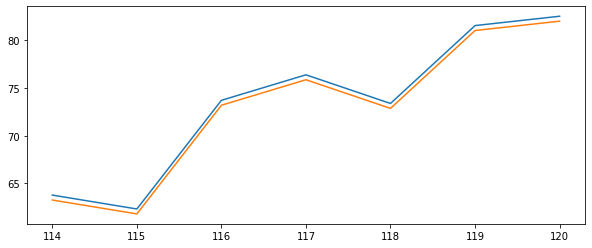

In [55]:
result_df[:7].Price.plot(figsize=(10,4))
result_df[:7].XGB_Predictions.plot(figsize=(10,4))

In [56]:
result_df.head(15)

,Price,Open,High,Low,Vol.,Change %,XGB_Predictions
114,63.787,65.923,66.326,61.690,7.82M,-3.23%,63.271189
115,62.332,63.799,64.447,61.045,9.45M,-2.28%,61.816189
116,73.705,62.308,74.613,62.084,10.44M,18.25%,73.189189
117,76.375,73.751,76.961,71.414,8.21M,3.62%,75.859189
118,73.376,76.225,77.061,68.289,9.78M,-3.93%,72.860189
119,81.527,73.354,83.186,71.489,9.07M,11.11%,81.011189
120,82.505,81.520,85.518,80.101,8.70M,1.20%,81.989189
121,87.482,82.579,88.379,80.488,8.95M,6.03%,0.000000


In [57]:
train.head(5).append(train.tail(5))

,Price,Open,High,Low,Vol.,Change %
0,44.478,43.148,44.787,42.792,10.24M,3.08%
1,42.950,44.453,45.130,42.310,7.59M,-3.43%
2,44.947,42.978,45.182,42.582,14.85M,4.65%
3,46.025,44.947,46.556,43.962,8.88M,2.40%
4,46.047,46.002,46.540,45.179,18.32M,0.05%
117,76.375,73.751,76.961,71.414,8.21M,3.62%
118,73.376,76.225,77.061,68.289,9.78M,-3.93%
119,81.527,73.354,83.186,71.489,9.07M,11.11%
120,82.505,81.520,85.518,80.101,8.70M,1.20%
121,87.482,82.579,88.379,80.488,8.95M,6.03%


# **AutoArima**

In [58]:
train[:-8].head(10)

,Price,Open,High,Low,Vol.,Change %
0,44.478,43.148,44.787,42.792,10.24M,3.08%
1,42.950,44.453,45.130,42.310,7.59M,-3.43%
2,44.947,42.978,45.182,42.582,14.85M,4.65%
3,46.025,44.947,46.556,43.962,8.88M,2.40%
4,46.047,46.002,46.540,45.179,18.32M,0.05%
5,46.078,46.019,46.538,44.582,19.53M,0.07%
6,45.246,46.042,47.120,44.851,10.51M,-1.81%
7,45.697,45.195,45.857,44.953,11.04M,1.00%
8,46.258,45.697,46.714,45.423,10.93M,1.23%
9,46.276,46.266,48.477,45.324,14.41M,0.04%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



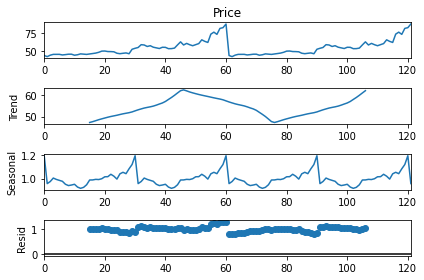

In [59]:
result = seasonal_decompose(train.Price, freq=30, model='multiplicative')
fig = result.plot()

In [60]:
arima_train = train[:-8].Price
arima_test = train[-8:].Price

In [61]:
# Arima Training
now = datetime.now()
print("Arima process started at : ",now)

arima_stepwise_model = auto_arima(arima_train, start_p=0, start_q=0,
                           max_p=13, max_q=13, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,
                           n_jobs=10)#n_jobs for parallel process
end = datetime.now()
print("Arima process finished at : ", end)
print("Process took : ", end-now)

print(arima_stepwise_model)

Arima process started at :  2020-11-22 10:02:05.884098


/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:379: UserWarning:

stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.



Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=626.357, BIC=634.202, Fit time=0.678 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=679.894, BIC=685.124, Fit time=0.025 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=654.214, BIC=664.674, Fit time=0.272 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=627.121, BIC=637.581, Fit time=1.070 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=628.054, BIC=638.514, Fit time=0.743 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 2, 12); AIC=628.020, BIC=638.481, Fit time=1.627 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2, 12); AIC=627.881, BIC=640.956, Fit time=2.920 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=627.362, BIC=637.822, Fit time=0.803 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=627.391, BIC=640.466, Fit time=1.283 seconds
Total fit time: 9.423 seconds
Arima process fi

In [62]:
# Fit arima model
arima_predicts = arima_stepwise_model.fit(arima_train)

In [63]:
# Predict results with auto-arima
future_forecast = arima_predicts.predict(n_periods=8)

In [64]:
future_forecast

array([66.54937936, 68.49031079, 70.27002041, 71.33295488, 71.7833351 ,
       71.49271559, 71.99819777, 66.83181615])

In [65]:
arima_rmse = sqrt(mean_squared_error(train['Price'][-8:], future_forecast))
arima_mape = mean_absolute_percentage_error(train['Price'][-8:], future_forecast)

In [66]:
print("Test RMSE:", np.mean(arima_rmse))
print("Test MAPE:", np.mean(arima_mape))

Test RMSE: 9.505414684481243
Test MAPE: 9.53636458853971


In [67]:
result_df.shape

(8, 7)

In [68]:
result_df['Arima_Predictions'] = future_forecast
result_df.head(8)

,Price,Open,High,Low,Vol.,Change %,XGB_Predictions,Arima_Predictions
114,63.787,65.923,66.326,61.690,7.82M,-3.23%,63.271189,66.549379
115,62.332,63.799,64.447,61.045,9.45M,-2.28%,61.816189,68.490311
116,73.705,62.308,74.613,62.084,10.44M,18.25%,73.189189,70.270020
117,76.375,73.751,76.961,71.414,8.21M,3.62%,75.859189,71.332955
118,73.376,76.225,77.061,68.289,9.78M,-3.93%,72.860189,71.783335
119,81.527,73.354,83.186,71.489,9.07M,11.11%,81.011189,71.492716
120,82.505,81.520,85.518,80.101,8.70M,1.20%,81.989189,71.998198
121,87.482,82.579,88.379,80.488,8.95M,6.03%,0.000000,66.831816


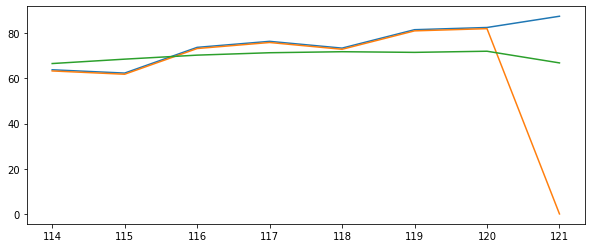

In [69]:
result_df[:8].Price.plot(figsize=(10,4))
result_df[:8].XGB_Predictions.plot(figsize=(10,4))
result_df[:8].Arima_Predictions.plot(figsize=(10,4))

In [70]:
#result_df.head(5).append(result_df.tail(5))
result_df.shape

(8, 8)

# **Long Short - Term Memory (LSTM)**

In [71]:
# define parameters
verbose, epochs, batch_size = 1, 50, 10
n_timesteps, n_features, n_outputs = train_X_lstm.shape[1], train_X_lstm.shape[2], train_Y_lstm.shape[1]

In [72]:
n_timesteps, n_features, n_outputs

(1, 30, 1)

In [73]:
pip list | grep tensorflow

tensorflow                    2.3.0          
tensorflow-addons             0.8.3          
tensorflow-datasets           4.0.1          
tensorflow-estimator          2.3.0          
tensorflow-gcs-config         2.3.0          
tensorflow-hub                0.10.0         
tensorflow-metadata           0.24.0         
tensorflow-privacy            0.2.2          
tensorflow-probability        0.11.0         


In [76]:
# define model
lstm_model = keras.Sequential()
lstm_model.add(Conv1D(filters=32, kernel_size=5,
                  strides=1, padding="causal",
                  activation="relu", input_shape=(n_timesteps, n_features)))
lstm_model.add(LSTM(50, activation='relu', input_shape=(n_timesteps, n_features)))

In [77]:
lstm_model.add(keras.layers.Dense(units=1))
lstm_model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

In [78]:
train_X_lstm.shape, train_Y_lstm.shape

((83, 1, 30), (83, 1, 1))

In [79]:
now = datetime.now()

history = lstm_model.fit(train_X_lstm, train_Y_lstm, epochs=epochs, batch_size=batch_size, validation_data=(test_X_lstm, test_Y_lstm), verbose=verbose, shuffle=False)
                    #callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=verbose, shuffle=False)

lstm_model.summary()

end = datetime.now()
print("LSTM process finished at : ", end)
print("LSTM process took : ", end-now)

Epoch 1/50
9/9 [==============================] - 0s 30ms/step - loss: 0.5381 - val_loss: 0.4956
Epoch 2/50
9/9 [==============================] - 0s 4ms/step - loss: 0.3447 - val_loss: 0.2373
Epoch 3/50
9/9 [==============================] - 0s 4ms/step - loss: 0.1030 - val_loss: 0.0131
Epoch 4/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0274 - val_loss: 0.0255
Epoch 5/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0208 - val_loss: 0.0132
Epoch 6/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0140 - val_loss: 0.0178
Epoch 7/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0113 - val_loss: 0.0085
Epoch 8/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0112 - val_loss: 0.0084
Epoch 9/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0105 - val_loss: 0.0104
Epoch 10/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0103 - val_loss: 0.0097
Epoch 11/50
9/9 [=====================

In [80]:
# Predict results with LSTM Model
lstm_predicts = lstm_model.predict(test_X_lstm, verbose=verbose)

1/1 [==============================] - 0s 1ms/step


In [81]:
lstm_predicts

array([[0.7972617 ],
       [0.8038282 ],
       [0.8022068 ],
       [0.8048712 ],
       [0.8118382 ],
       [0.8036427 ],
       [0.81662923],
       [0.8033779 ]], dtype=float32)

In [82]:
# Invert scaled predictons to time series
predictions = list()
start = 8 # test period
l = len(test_scaled) - start

lstm_rmse = []
lstm_mape = []

for i in range(len(test_scaled)):
    X1, y = test_scaled[l, 0:-1], test_scaled[l, -1]
    X1 = X1[-12:] # ts_window

    X1 = X1.reshape((1,-1))

    yhat = invert_scale(scaler, X1[0], lstm_predicts[i][0])
        
    l=l+1

    yhat = inverse_difference(train['Price'], yhat, len(test_scaled) + 1 - i)

    predictions.append(yhat)

    lstm_rmse.append(sqrt(mean_squared_error([train['Price'][-8:].iloc[i]], [yhat])))
    lstm_mape.append(mean_absolute_percentage_error([train['Price'][-8:].iloc[i]], [yhat]))

In [83]:
predictions

[66.26170025515556,
 64.49276494932175,
 62.949599964141846,
 74.46748133182525,
 77.51632630825043,
 74.07167859172822,
 82.92884760093689,
 83.18628150701522]

In [84]:
print("LSTM RMSE:", np.mean(lstm_rmse))
print("LSTM MAPE:", np.mean(lstm_mape))

LSTM RMSE: 4.201699714869263
LSTM MAPE: 5.580948318230796


In [85]:
result_df['LSTM_Predictions'] = 0
for i in range(7):
    result_df['LSTM_Predictions'].iloc[i] = predictions[i+1]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
result_df.head(9)

,Price,Open,High,Low,Vol.,Change %,XGB_Predictions,Arima_Predictions,LSTM_Predictions
114,63.787,65.923,66.326,61.690,7.82M,-3.23%,63.271189,66.549379,64.492765
115,62.332,63.799,64.447,61.045,9.45M,-2.28%,61.816189,68.490311,62.949600
116,73.705,62.308,74.613,62.084,10.44M,18.25%,73.189189,70.270020,74.467481
117,76.375,73.751,76.961,71.414,8.21M,3.62%,75.859189,71.332955,77.516326
118,73.376,76.225,77.061,68.289,9.78M,-3.93%,72.860189,71.783335,74.071679
119,81.527,73.354,83.186,71.489,9.07M,11.11%,81.011189,71.492716,82.928848
120,82.505,81.520,85.518,80.101,8.70M,1.20%,81.989189,71.998198,83.186282
121,87.482,82.579,88.379,80.488,8.95M,6.03%,0.000000,66.831816,0.000000


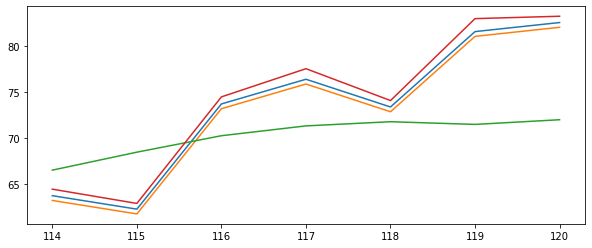

In [87]:
result_df[:7].Price.plot(figsize=(10,4))
result_df[:7].XGB_Predictions.plot(figsize=(10,4))
result_df[:7].Arima_Predictions.plot(figsize=(10,4))
result_df[:7].LSTM_Predictions.plot(figsize=(10,4))

In [88]:
result_df.head(8)

,Price,Open,High,Low,Vol.,Change %,XGB_Predictions,Arima_Predictions,LSTM_Predictions
114,63.787,65.923,66.326,61.690,7.82M,-3.23%,63.271189,66.549379,64.492765
115,62.332,63.799,64.447,61.045,9.45M,-2.28%,61.816189,68.490311,62.949600
116,73.705,62.308,74.613,62.084,10.44M,18.25%,73.189189,70.270020,74.467481
117,76.375,73.751,76.961,71.414,8.21M,3.62%,75.859189,71.332955,77.516326
118,73.376,76.225,77.061,68.289,9.78M,-3.93%,72.860189,71.783335,74.071679
119,81.527,73.354,83.186,71.489,9.07M,11.11%,81.011189,71.492716,82.928848
120,82.505,81.520,85.518,80.101,8.70M,1.20%,81.989189,71.998198,83.186282
121,87.482,82.579,88.379,80.488,8.95M,6.03%,0.000000,66.831816,0.000000


In [89]:
xgb_mape = []
arima_mape = []
lstm_mape = []

for i in range(7):
    #print(result_df['Price'].iloc[i], result_df['XGB_Predictions'].iloc[i])
    xgb_mape.append(mean_absolute_percentage_error([result_df['Price'].iloc[i]], [result_df['XGB_Predictions'].iloc[i]]))

    arima_mape.append(mean_absolute_percentage_error([result_df['Price'].iloc[i]], [result_df['Arima_Predictions'].iloc[i]]))

    lstm_mape.append(mean_absolute_percentage_error([result_df['Price'].iloc[i]], [result_df['LSTM_Predictions'].iloc[i]]))

print("XGB MAPE: %", np.mean(xgb_mape))
print("Arima MAPE: %", np.mean(arima_mape))
print("LSTM MAPE: %", np.mean(lstm_mape))


XGB MAPE: % 0.7103152632292006
Arima MAPE: % 7.526550099734558
LSTM MAPE: % 1.1599249537857481


In [91]:
#Export dataframe as a csv
result_df.to_csv("results_22Nov2020.csv", index=0)